# Model Training

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
SEED = 2024

## Load Data

In [6]:
data = pd.read_csv('data/ALL_DATA.csv')
data.head()

,landmark_0,landmark_1,landmark_2,landmark_3,landmark_4,landmark_5,landmark_6,landmark_7,landmark_8,landmark_9,...,landmark_33,landmark_34,landmark_35,landmark_36,landmark_37,landmark_38,landmark_39,landmark_40,landmark_41,class
0,0.257211,0.744543,0.339968,0.727104,0.412922,0.627686,0.430567,0.515687,0.429557,0.432274,...,0.557774,0.202958,0.487308,0.206469,0.471129,0.214699,0.552157,0.219286,0.558994,A
1,0.728281,0.759081,0.651978,0.733231,0.597377,0.654941,0.577211,0.569443,0.575342,0.500667,...,0.592039,0.765293,0.558770,0.747134,0.504385,0.739077,0.560152,0.745142,0.584256,A
2,0.239983,0.720653,0.327146,0.702203,0.406762,0.595091,0.427949,0.473646,0.424589,0.384379,...,0.524031,0.180131,0.454967,0.185324,0.425563,0.194856,0.514893,0.198210,0.528913,A
3,0.765670,0.719709,0.681658,0.696189,0.619881,0.611631,0.596331,0.517771,0.590325,0.442671,...,0.535039,0.801037,0.503700,0.785114,0.447262,0.780163,0.506798,0.784924,0.530553,A
4,0.235272,0.711383,0.322961,0.692866,0.402829,0.583089,0.424225,0.457621,0.422013,0.365959,...,0.507626,0.171638,0.440190,0.177146,0.411698,0.187595,0.501418,0.190326,0.514040,A


In [7]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

class_names = label_encoder.classes_

In [8]:
data.shape

(10324, 43)

In [9]:
target = data['class']
data = data.drop('class', axis=1)

## Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

In [11]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [12]:
X_train.shape, X_test.shape

((7226, 42), (3098, 42))

In [13]:
y_train.shape, y_test.shape

((7226,), (3098,))

## Model

In [14]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(28, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,660 (68.98 KB)

 Trainable params: 17,212 (67.23 KB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
history = model.fit(
    X_train, 
    y_train_encoded, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1316 - loss: 3.1926 - val_accuracy: 0.0788 - val_loss: 3.0358
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4287 - loss: 1.9136 - val_accuracy: 0.4108 - val_loss: 1.9926
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5803 - loss: 1.3311 - val_accuracy: 0.7490 - val_loss: 1.0801
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6778 - loss: 1.0082 - val_accuracy: 0.7123 - val_loss: 0.8540
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7062 - loss: 0.8529 - val_accuracy: 0.8444 - val_loss: 0.5654
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7430 - loss: 0.7653 - val_accuracy: 0.8458 - val_loss: 0.5231
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.6447 - val_accuracy: 0.7095 - val_loss: 0.8250
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7850 - loss: 0.6377 - val_accuracy: 0.

In [16]:
model.save('asl_classifier_model.keras')

## Model Evaluation

In [17]:
from sklearn.metrics import classification_report

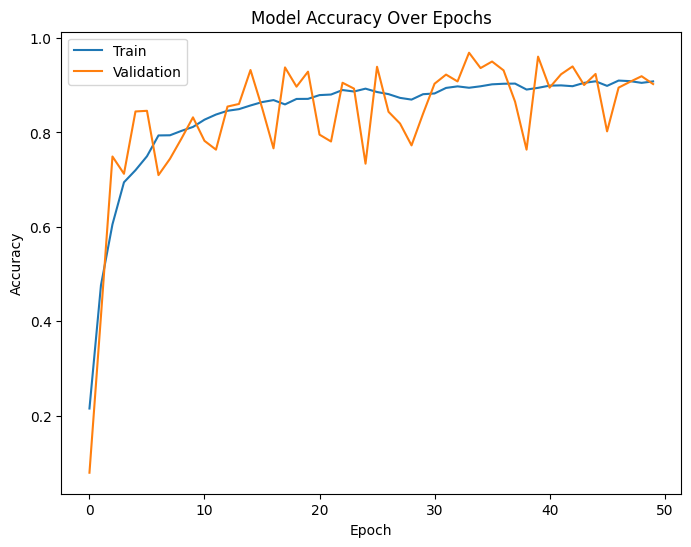

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

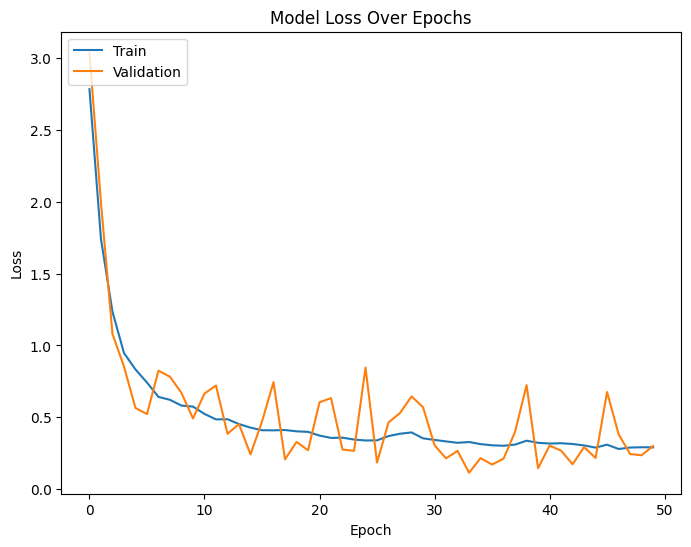

In [19]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9007 - loss: 0.2798
Test loss: 0.32553890347480774
Test accuracy: 0.8928340673446655


In [21]:
# Get predicted probabilities 
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       0.62      1.00      0.77       116
           B       0.94      1.00      0.97       116
           C       0.85      0.96      0.90        98
           D       0.96      0.99      0.97        87
           E       0.85      0.99      0.91       105
           F       1.00      0.97      0.99       106
           G       1.00      1.00      1.00        84
           H       1.00      1.00      1.00       104
           I       0.99      1.00      1.00       104
           J       1.00      1.00      1.00       100
           K       0.99      0.98      0.99       119
           L       0.71      1.00      0.83       111
           M       0.83      0.93      0.88       117
           N       1.00      0.40      0.57       119
           O       0.97      0.88      0.92       137
           P       1.00      0.98      0.99       101
           Q       0.98      1.00      0.99       111
           R       0.58    

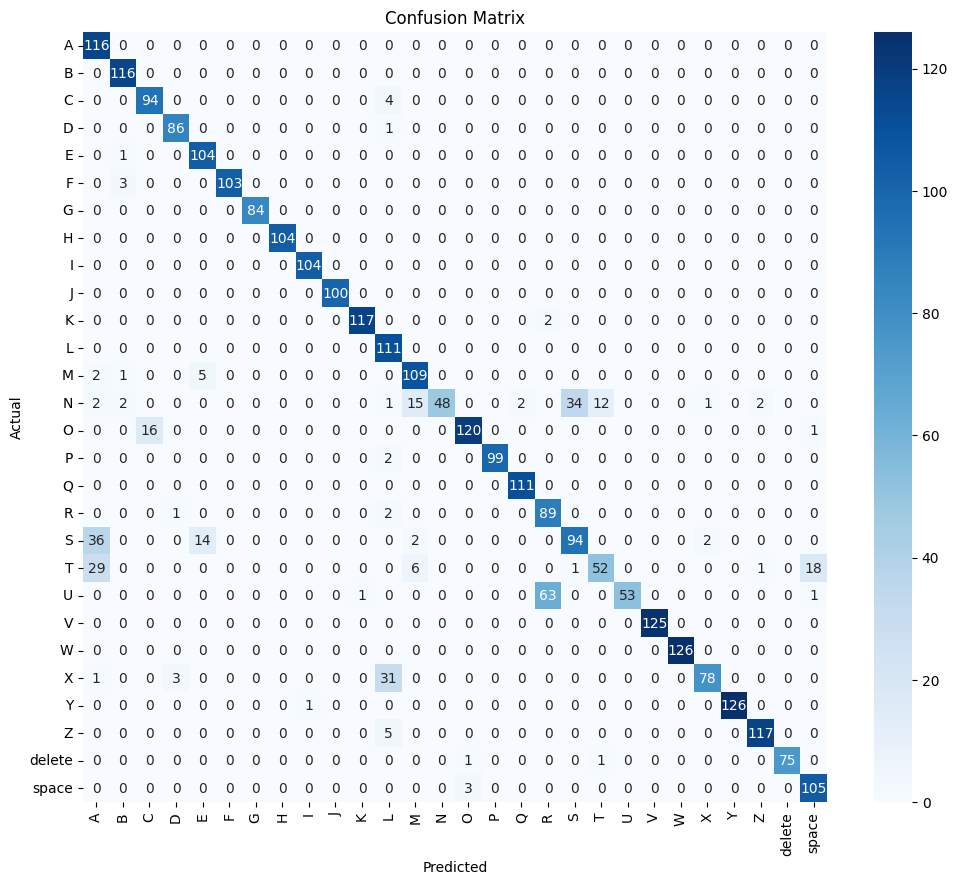

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### SHAP Values

In [ ]:
import matplotlib.pyplot as plt
import shap

In [41]:
# Reduce the background set size even further to 10 samples
background_sample = shap.sample(X_train, 10)

In [42]:
# Create the explainer with KernelExplainer
explainer = shap.KernelExplainer(model.predict, background_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
# Calculating SHAP values for a small subset of the test set
X_test_sample = X_test[:50]
shap_values = explainer.shap_values(X_test_sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
667/667 ━━━━━━

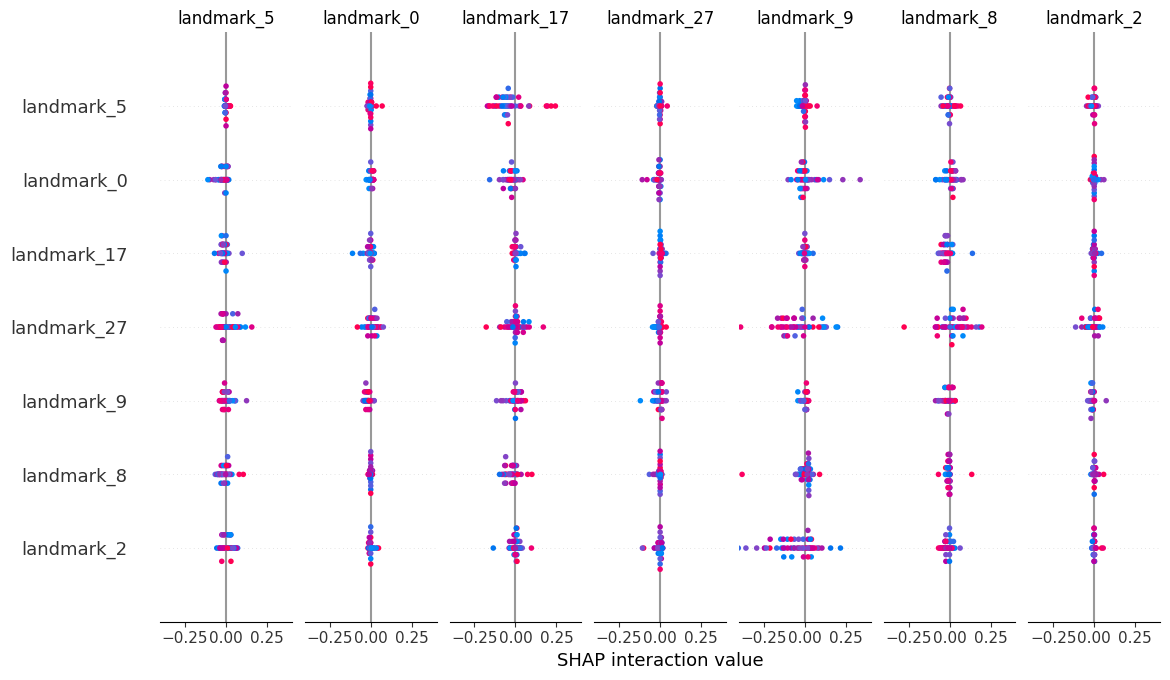

In [ ]:
# Graph the summary plot
shap.summary_plot(shap_values, X_test_sample)

### Top-K Accuracy

In [50]:
from tensorflow.keras.metrics import top_k_categorical_accuracy

In [52]:
# Function to calculate top-k accuracy
def top_k_accuracy(y_true, y_pred, k=3):
    return top_k_categorical_accuracy(y_true, y_pred, k=k).numpy().mean()


In [53]:
top_3_accuracy = top_k_accuracy(y_test_encoded, y_pred_prob, k=3)
print(f'Top-3 Accuracy: {top_3_accuracy:.4f}')

Top-3 Accuracy: 0.9790


### Curva ROC y AUC

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [56]:
# Binaraize class labels to calculate ROC curve
y_test_binarized = label_binarize(y_true, classes=range(len(class_names)))

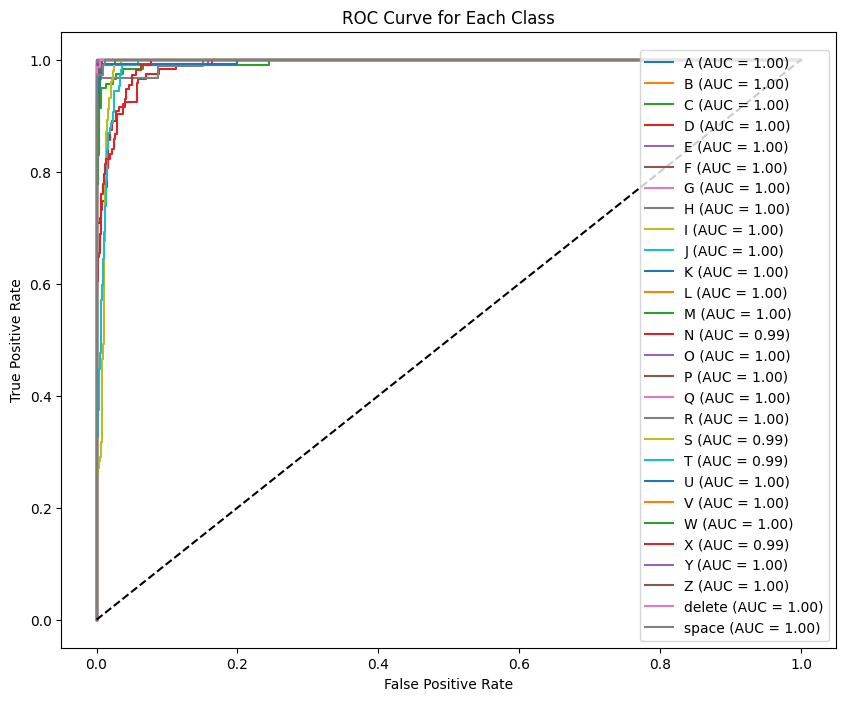

In [59]:
# Calculate ROC curve and AUC for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

### Log Loss

In [62]:
from sklearn.metrics import log_loss

In [63]:
# Calculate log loss
log_loss_value = log_loss(y_test_encoded, y_pred_prob)
print(f'Log Loss: {log_loss_value:.4f}')

Log Loss: 0.3255


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


### Hamming Loss

In [ ]:
from sklearn.metrics import hamming_loss

Hamming Loss: 0.1072


In [ ]:
# Calculate Hamming loss
hamming = hamming_loss(y_true, y_pred)
print(f"Hamming Loss: {hamming:.4f}")